In [1]:
#Import
import pandas as pd
import numpy as np
import operator

#Train et test
from sklearn.model_selection import train_test_split

In [115]:
path_jeu1 = 'C:/Users/RetailAdmin/Desktop/PIP_2022NA/DATA1/DATA1/DONNEES_BRUTES/'

df_jeu1_toulouse = pd.read_csv(path_jeu1 + 'DATA_FRAUDE_TOULOUSE.csv')
df_jeu1_languedoc = pd.read_csv(path_jeu1 + 'DATA_FRAUDE_LANGUEDOC.csv')

In [127]:
data1 = pd.read_csv("C:/Users/RetailAdmin/Desktop/PIP_2022NA/DATA1/DATA1/DONNEES_CONCAT_TLSE-LD/DATA1_COMPLET.csv")

MemoryError: Unable to allocate 1.61 GiB for an array with shape (254, 849346) and data type float64

In [13]:
df_jeu1_toulouse[df_jeu1_toulouse['TOP_FRAUDE'] == 1]['TOP_FRAUDE'].count()/df_jeu1_toulouse['TOP_FRAUDE'].count() * 100
#Pourcentage de fraudés dans le jeu de Toulouse complet

0.15379222218452807

In [10]:
#### affichage des variables ayant moins de 1% de données manquantes
for col in df_jeu1_toulouse:
    if round(df_jeu1_toulouse[col].isnull().sum() / df_jeu1_toulouse.shape[0]*100,2) > 0 and round(df_jeu1_toulouse[col].isnull().sum() / df_jeu1_toulouse.shape[0]*100,2) < 1 : 
        print(col," :",round(df_jeu1_toulouse[col].isnull().sum() / df_jeu1_toulouse.shape[0]*100,2), "%")

INDICMAIL  : 0.14 %
INDICTEL  : 0.14 %
INDICPOR  : 0.14 %
INDICSMS  : 0.14 %
INDICMAILING  : 0.14 %
TOP_E_RELEVE  : 0.14 %
MESSAGERIE_WEB_ACTIVE  : 0.14 %
FIAB_TEL_DOMICILE  : 0.14 %
FIAB_TEL_TRAVAIL  : 0.14 %
FIAB_TEL_PORTABLE  : 0.14 %
FIAB_EMAIL  : 0.14 %
REFUS_SEA  : 0.14 %
NBJ_CNT_AGENCE_DEPOT_6M  : 0.14 %
NBJ_CNT_AGENCE_VENTE_6M  : 0.14 %
NBJ_CNT_RDV_AGENCE_6M  : 0.14 %
NBJ_CNT_AUTOMATE_RETRAIT_6M  : 0.14 %
NBJ_CNT_AUTOMATES_DEPOT_6M  : 0.14 %
NBJ_CNT_AGENCE_RETRAIT_6M  : 0.14 %
NBJ_CNT_AGENCE_6M  : 0.14 %
NBJ_CNT_SMS_6M  : 0.14 %
NBJ_CNT_EMAIL_6M  : 0.14 %
NBJ_CNT_APPELENTRANTS_6M  : 0.14 %
NBJ_CNT_AUTOMATE_6M  : 0.14 %
NBJ_CNT_LETTRES_6M  : 0.14 %
TOT_CNX_WEB_WEEK_6M  : 0.14 %
TOT_CNX_WEB_END_6M  : 0.14 %
TOT_CCOMPTE_WEB_6M  : 0.14 %
TOT_IMPRESSIONRIB_WEB_6M  : 0.14 %
TOT_TLCHGMTEDOC_WEB_6M  : 0.14 %
TOT_CCOMPTE_MBANQUE_6M  : 0.14 %
TOT_CMS_WEB_6M  : 0.14 %
TOT_CVAD_WEB_6M  : 0.14 %
TOT_VEL_WEB_6M  : 0.14 %
TOT_ATT_SIGN_VAD_WEB_6M  : 0.14 %
TOT_CHABITAT_WEB_6M  : 0.14 %
TOT_MOD

In [111]:
#### affichage des variables ayant 150 données manquantes
for col in data1:
    if data1[col].isnull().sum() == 150: 
        print(col," :",data1[col].isnull().sum())

anciennete  : 150
top_situ_particuliere  : 150
top_affecte  : 150
top_entretien_3M  : 150
top_entretien_6M  : 150
top_entretien_12M  : 150
nb_mois_dernier_entretien  : 150
NB_PARTENAIRES  : 150
nb_mineurs  : 150
csp_1  : 150
contrat_travail_1  : 150
Tranche_age_1  : 150
sexe_1  : 150
Tranche_age_moyen  : 150
situ_globale  : 150
SURFACE_FINANCIERE  : 150
ENCOURS_DAV  : 150
MONETAIRE_DISPONIBLE  : 150
MONETAIRE_BLOQUE  : 150
EMPRUNTS  : 150
EPARGNE_LOGEMENT  : 150
SURFACE_FINANCIERE_M6  : 150
SURFACE_FINANCIERE_ECART_M6  : 150
ENCOURS_DAV_M6  : 150
ENCOURS_DAV_ECART_M6  : 150
MONETAIRE_DISPONIBLE_M6  : 150
MONETAIRE_DISPONIBLE_ECART_M6  : 150
MONETAIRE_BLOQUE_M6  : 150
MONETAIRE_BLOQUE_ECART_M6  : 150
EMPRUNTS_M6  : 150
EMPRUNTS_ECART_M6  : 150
EPARGNE_LOGEMENT_M6  : 150
EPARGNE_LOGEMENT_ECART_M6  : 150
ENCOURS_CREDIT  : 150
top_CREDIT  : 150
ENCOURS_REVOLVING  : 150
top_REVOLVING  : 150
ENCOURS_CONSO  : 150
top_credit_CONSO  : 150
ENCOURS_HABITAT  : 150
top_credit_HABITAT  : 150
top_pro

In [107]:
#retrouver le numero de colonne avec le nom
def numeroColonne(nomCol):
    n = 1
    for col in data1:
        if col == nomCol : 
            print(n)
        n += 1

numeroColonne('EMPRUNTS')

132


In [70]:
#On remplace les NaN de ancienneté par la médiane
#data1['anciennete'].value_counts()
data1['anciennete'].fillna(data1['anciennete'].median(), inplace = True)
#data1['anciennete'].isnull().sum()

In [71]:
#On remplace les NaN de top_situ_particuliere par la médiane
#data1['top_situ_particuliere'].value_counts()
data1['top_situ_particuliere'].fillna(data1['top_situ_particuliere'].median(), inplace = True)
#data1['top_situ_particuliere'].isnull().sum()

In [72]:
#On remplace les NaN de top_affecte avec la méthode pad
#data1['top_affecte'].value_counts()
data1['top_affecte'] = data1['top_affecte'].fillna(method ='pad')
#data1['top_affecte'].isnull().sum()

In [73]:
#On remplace les NaN de top_entretien_3M avec la méthode pad
#data1['top_entretien_3M'].value_counts()
data1['top_entretien_3M'] = data1['top_entretien_3M'].fillna(method ='pad')
#data1['top_entretien_3M'].isnull().sum()

In [74]:
#On remplace les NaN de top_entretien_6M avec la méthode pad
#data1['top_entretien_6M'].value_counts()
data1['top_entretien_6M'] = data1['top_entretien_6M'].fillna(method ='pad')
#data1['top_entretien_6M'].isnull().sum()

In [75]:
#On remplace les NaN de top_entretien_12M avec la méthode pad
#data1['top_entretien_12M'].value_counts()
data1['top_entretien_12M'] = data1['top_entretien_12M'].fillna(method ='pad')
#data1['top_entretien_12M'].isnull().sum()

In [76]:
#On remplace les NaN de NB_PARTENAIRES avec la médiane
#data1['NB_PARTENAIRES'].value_counts()
data1['NB_PARTENAIRES'].fillna(data1['NB_PARTENAIRES'].median(), inplace = True)
#data1['NB_PARTENAIRES'].isnull().sum()

In [77]:
#On remplace les NaN de nb_mineurs avec la médiane
#data1['nb_mineurs'].value_counts()
data1['nb_mineurs'].fillna(data1['nb_mineurs'].median(), inplace = True)
#data1['nb_mineurs'].isnull().sum()

In [78]:
#On remplace les NaN de csp_1 avec la méthode pad
#data1['csp_1'].value_counts()
data1['csp_1'] = data1['csp_1'].fillna(method ='pad')
#data1['csp_1'].isnull().sum()

In [79]:
#On remplace les NaN de contrat_travail_1 avec la méthode pad
#data1['contrat_travail_1'].value_counts()
data1['contrat_travail_1'] = data1['contrat_travail_1'].fillna(method ='pad')
#data1['contrat_travail_1'].isnull().sum()

In [80]:
#On remplace les NaN de Tranche_age_1 avec la méthode pad
#data1['Tranche_age_1'].value_counts()
data1['Tranche_age_1'] = data1['Tranche_age_1'].fillna(method ='pad')
#data1['Tranche_age_1'].isnull().sum()

In [81]:
#On remplace les NaN de sexe_1 avec la méthode pad
#data1['sexe_1'].value_counts()
data1['sexe_1'] = data1['sexe_1'].fillna(method ='pad')
#data1['sexe_1'].isnull().sum()

In [85]:
#On remplace les NaN de Tranche_age_moyen avec la méthode pad
#data1['Tranche_age_moyen'].value_counts()
data1['Tranche_age_moyen'] = data1['Tranche_age_moyen'].fillna(method ='pad')
#data1['Tranche_age_moyen'].isnull().sum()

In [ ]:
#On remplace les NaN de situ_globale avec la méthode pad
#data1['situ_globale'].value_counts()
data1['situ_globale'] = data1['situ_globale'].fillna(method ='pad')
#data1['situ_globale'].isnull().sum()

In [96]:
#On remplace les NaN de SURFACE_FINANCIERE par la médiane
#data1['SURFACE_FINANCIERE'].value_counts()
data1['SURFACE_FINANCIERE'].fillna(data1['SURFACE_FINANCIERE'].median(), inplace = True)
#data1['SURFACE_FINANCIERE'].isnull().sum()

In [100]:
#On remplace les NaN de ENCOURS_DAV par la médiane
#data1['ENCOURS_DAV'].value_counts()
data1['ENCOURS_DAV'].fillna(data1['ENCOURS_DAV'].median(), inplace = True)
#data1['ENCOURS_DAV'].isnull().sum()

In [103]:
#On remplace les NaN de MONETAIRE_DISPONIBLE par la médiane
#data1['MONETAIRE_DISPONIBLE'].value_counts()
data1['MONETAIRE_DISPONIBLE'].fillna(data1['MONETAIRE_DISPONIBLE'].median(), inplace = True)
#data1['MONETAIRE_DISPONIBLE'].isnull().sum()

In [105]:
#On remplace les NaN de MONETAIRE_BLOQUE par la médiane
#data1['MONETAIRE_BLOQUE'].value_counts()
data1['MONETAIRE_BLOQUE'].fillna(data1['MONETAIRE_BLOQUE'].median(), inplace = True)
#data1['MONETAIRE_BLOQUE'].isnull().sum()

In [108]:
#On remplace les NaN de EMPRUNTS par la médiane
#data1['EMPRUNTS'].value_counts()
data1['EMPRUNTS'].fillna(data1['EMPRUNTS'].median(), inplace = True)
#data1['MONETAIRE_BLOQUE'].isnull().sum()

In [ ]:
#On remplace les NaN de EMPRUNTS par la médiane
#data1['EMPRUNTS'].value_counts()
data1['EMPRUNTS'].fillna(data1['EMPRUNTS'].median(), inplace = True)
#data1['MONETAIRE_BLOQUE'].isnull().sum()

In [124]:
for col in data1: 
    data1[col] = data1[col].fillna(method ='pad')
data1.iloc[0] = data1.iloc[0].fillna(method = 'bfill')

In [125]:
data1.head()

ID  TOP_FRAUDE  TOP_FRAUDE_CARTE  \
0  8312v5IodTRgOR8/FWWjGEwsg==           0                 0   
1  831pI3Dnm1zz6NG0iCJTfcilQ==           0                 0   
2  831b9S86qzWBJCaqgYOVPwWMQ==           0                 0   
3  831tT9jw5y/rwwLEMZF7PyE8w==           0                 0   
4  8317VwmuKeVaijtrz0cTWOm4A==           0                 0   

   TOP_FRAUDE_VIREMENT Date_debut_fraude cp_ou_pays SECTEUR_GESTION  \
0                    0         01FEB2021      fìPÅæ  SECTEUR CENTRE   
1                    0         01MAR2021      aLÄsb     SECTEUR EST   
2                    0         01MAR2021      Z0ÎuP     SECTEUR SUD   
3                    0         01MAR2021      ëmzXM    SECTEUR NORD   
4                    0         01SEP2020      å3èJ3  SECTEUR CENTRE   

     INDICMAIL    INDICTEL    INDICPOR  ... mt_factu_ttc_M mt_factu_ttc_M6  \
0  MAIL_OPTOUT  TEL_NEUTRE  POR_OPTOUT  ...           60.0            42.0   
1   MAIL_OPTIN   TEL_OPTIN   POR_OPTIN  ...           60.0            42.0   
2  MAIL_OPTOUT   TEL_OPTIN   POR_OPTIN  ...            7.0             6.0   
3  MAIL_OPTOUT  TEL_NEUTRE  POR_OPTOUT  ...            6.0             6.0   
4   MAIL_OPTIN  TEL_NEUTRE   POR_OPTIN  ...           41.0            13.0   

   mt_reduc_ttc_M  mt_reduc_ttc_M6  mt_rist_ttc_M  mt_rist_ttc_M6  \
0             0.0              0.0           15.0             0.0   
1             0.0              0.0           15.0             0.0   
2             0.0              0.0            0.0             0.0   
3             0.0              0.0            0.0             0.0   
4             0.0              0.0            9.0             0.0   

   Fidelite_calcule  Flag_bq_principale             profil  localisation  
0                NF                 0.0    Très peu actifs      toulouse  
1                FI                 1.0       Hyper actifs      toulouse  
2                FI                 1.0  Digital Ma Banque      toulouse  
3                FI                 1.0       Hyper actifs      toulouse  
4                FI                 1.0       Hyper actifs      toulouse  

[5 rows x 288 columns]

In [24]:
df_jeu1_toulouse.corr(method='pearson')

TOP_FRAUDE  TOP_FRAUDE_CARTE  TOP_FRAUDE_VIREMENT  \
TOP_FRAUDE               1.000000          0.705099             0.780979   
TOP_FRAUDE_CARTE         0.705099          1.000000             0.195025   
TOP_FRAUDE_VIREMENT      0.780979          0.195025             1.000000   
TOP_E_RELEVE             0.014470          0.010328             0.011333   
MESSAGERIE_WEB_ACTIVE    0.045369          0.030478             0.039615   
...                           ...               ...                  ...   
mt_reduc_ttc_M          -0.000350         -0.000247            -0.000274   
mt_reduc_ttc_M6         -0.000267         -0.000130            -0.000169   
mt_rist_ttc_M           -0.000499         -0.000143            -0.001043   
mt_rist_ttc_M6          -0.000981         -0.001980            -0.000055   
Flag_bq_principale       0.013340          0.009327             0.010520   

                       TOP_E_RELEVE  MESSAGERIE_WEB_ACTIVE  FIAB_TEL_DOMICILE  \
TOP_FRAUDE                 0.014470               0.045369           0.002391   
TOP_FRAUDE_CARTE           0.010328               0.030478          -0.002085   
TOP_FRAUDE_VIREMENT        0.011333               0.039615           0.004693   
TOP_E_RELEVE               1.000000               0.519339          -0.165482   
MESSAGERIE_WEB_ACTIVE      0.519339               1.000000          -0.133586   
...                             ...                    ...                ...   
mt_reduc_ttc_M            -0.000279              -0.004049           0.001037   
mt_reduc_ttc_M6           -0.002437               0.001341          -0.000641   
mt_rist_ttc_M              0.028513               0.028018          -0.021595   
mt_rist_ttc_M6             0.027212               0.027363          -0.020570   
Flag_bq_principale         0.332218               0.532797           0.040779   

                       FIAB_TEL_TRAVAIL  FIAB_TEL_PORTABLE  FIAB_EMAIL  \
TOP_FRAUDE                     0.004879           0.014609    0.008225   
TOP_FRAUDE_CARTE               0.003071           0.009682    0.004040   
TOP_FRAUDE_VIREMENT            0.005625           0.012092    0.007017   
TOP_E_RELEVE                   0.041389           0.304546    0.323102   
MESSAGERIE_WEB_ACTIVE          0.043265           0.422371    0.217528   
...                                 ...                ...         ...   
mt_reduc_ttc_M                 0.002011          -0.005520   -0.003133   
mt_reduc_ttc_M6                0.004012           0.002290    0.002718   
mt_rist_ttc_M                  0.008537           0.022190    0.027114   
mt_rist_ttc_M6                 0.006966           0.021944    0.030382   
Flag_bq_principale             0.029436           0.249914    0.142587   

                       REFUS_SEA  ...  top_produit_Credit  \
TOP_FRAUDE             -0.000365  ...            0.010117   
TOP_FRAUDE_CARTE       -0.000257  ...            0.009349   
TOP_FRAUDE_VIREMENT    -0.000285  ...            0.006794   
TOP_E_RELEVE           -0.004977  ...            0.338408   
MESSAGERIE_WEB_ACTIVE  -0.007759  ...            0.370388   
...                          ...  ...                 ...   
mt_reduc_ttc_M         -0.000068  ...           -0.003903   
mt_reduc_ttc_M6        -0.000068  ...           -0.003558   
mt_rist_ttc_M           0.008846  ...            0.026353   
mt_rist_ttc_M6          0.002731  ...            0.020099   
Flag_bq_principale     -0.010575  ...            0.476370   

                       top_produit_Epargne  top_produit_Services  \
TOP_FRAUDE                        0.011717              0.007055   
TOP_FRAUDE_CARTE                  0.008958              0.004618   
TOP_FRAUDE_VIREMENT               0.008272              0.006037   
TOP_E_RELEVE                      0.198258              0.171866   
MESSAGERIE_WEB_ACTIVE             0.320225              0.321087   
...                                    ...                   ...   
mt_reduc_ttc_M                    0.006

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## by sum 
df=df_jeu1_toulouse.copy()
corr_matrix = df.corr().abs()

In [43]:
corr_matrix

TOP_FRAUDE  TOP_FRAUDE_CARTE  TOP_FRAUDE_VIREMENT  \
TOP_FRAUDE               1.000000          0.705099             0.780979   
TOP_FRAUDE_CARTE         0.705099          1.000000             0.195025   
TOP_FRAUDE_VIREMENT      0.780979          0.195025             1.000000   
TOP_E_RELEVE             0.014470          0.010328             0.011333   
MESSAGERIE_WEB_ACTIVE    0.045369          0.030478             0.039615   
...                           ...               ...                  ...   
mt_reduc_ttc_M           0.000350          0.000247             0.000274   
mt_reduc_ttc_M6          0.000267          0.000130             0.000169   
mt_rist_ttc_M            0.000499          0.000143             0.001043   
mt_rist_ttc_M6           0.000981          0.001980             0.000055   
Flag_bq_principale       0.013340          0.009327             0.010520   

                       TOP_E_RELEVE  MESSAGERIE_WEB_ACTIVE  FIAB_TEL_DOMICILE  \
TOP_FRAUDE                 0.014470               0.045369           0.002391   
TOP_FRAUDE_CARTE           0.010328               0.030478           0.002085   
TOP_FRAUDE_VIREMENT        0.011333               0.039615           0.004693   
TOP_E_RELEVE               1.000000               0.519339           0.165482   
MESSAGERIE_WEB_ACTIVE      0.519339               1.000000           0.133586   
...                             ...                    ...                ...   
mt_reduc_ttc_M             0.000279               0.004049           0.001037   
mt_reduc_ttc_M6            0.002437               0.001341           0.000641   
mt_rist_ttc_M              0.028513               0.028018           0.021595   
mt_rist_ttc_M6             0.027212               0.027363           0.020570   
Flag_bq_principale         0.332218               0.532797           0.040779   

                       FIAB_TEL_TRAVAIL  FIAB_TEL_PORTABLE  FIAB_EMAIL  \
TOP_FRAUDE                     0.004879           0.014609    0.008225   
TOP_FRAUDE_CARTE               0.003071           0.009682    0.004040   
TOP_FRAUDE_VIREMENT            0.005625           0.012092    0.007017   
TOP_E_RELEVE                   0.041389           0.304546    0.323102   
MESSAGERIE_WEB_ACTIVE          0.043265           0.422371    0.217528   
...                                 ...                ...         ...   
mt_reduc_ttc_M                 0.002011           0.005520    0.003133   
mt_reduc_ttc_M6                0.004012           0.002290    0.002718   
mt_rist_ttc_M                  0.008537           0.022190    0.027114   
mt_rist_ttc_M6                 0.006966           0.021944    0.030382   
Flag_bq_principale             0.029436           0.249914    0.142587   

                       REFUS_SEA  ...  top_produit_Credit  \
TOP_FRAUDE              0.000365  ...            0.010117   
TOP_FRAUDE_CARTE        0.000257  ...            0.009349   
TOP_FRAUDE_VIREMENT     0.000285  ...            0.006794   
TOP_E_RELEVE            0.004977  ...            0.338408   
MESSAGERIE_WEB_ACTIVE   0.007759  ...            0.370388   
...                          ...  ...                 ...   
mt_reduc_ttc_M          0.000068  ...            0.003903   
mt_reduc_ttc_M6         0.000068  ...            0.003558   
mt_rist_ttc_M           0.008846  ...            0.026353   
mt_rist_ttc_M6          0.002731  ...            0.020099   
Flag_bq_principale      0.010575  ...            0.476370   

                       top_produit_Epargne  top_produit_Services  \
TOP_FRAUDE                        0.011717              0.007055   
TOP_FRAUDE_CARTE                  0.008958              0.004618   
TOP_FRAUDE_VIREMENT               0.008272              0.006037   
TOP_E_RELEVE                      0.198258              0.171866   
MESSAGERIE_WEB_ACTIVE             0.320225              0.321087   
...                                    ...                   ...   
mt_reduc_ttc_M                    0.006

In [49]:
corr_matrix['sum'] = corr_matrix[list(corr_matrix.columns)].sum(axis=1)
corr_matrix=corr_matrix.sort_values(by=['sum'],ascending=False)
## choix de 15 variables les plus corrélée
cor_15=corr_matrix[:15]## a changer 
col=cor_15.index
cor_15=cor_15[col]

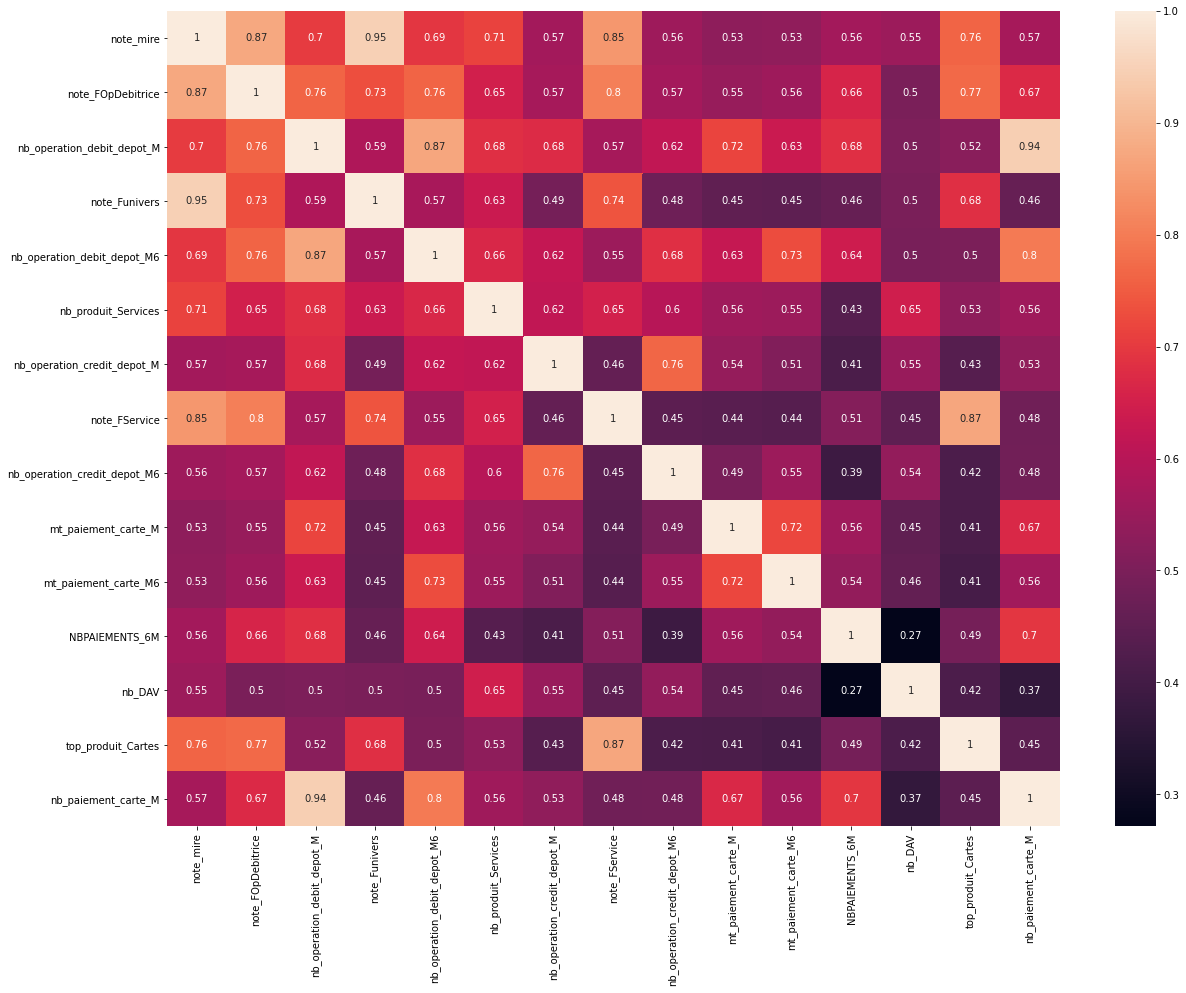

In [50]:
## plot matrice de corrélation
plt.subplots(figsize=(20,15))
sns.heatmap(cor_15, annot = True)
plt.show()

In [4]:
!pip install sweetviz

In [12]:
import sweetviz as sv
my_report = sv.analyze(data1, pairwise_analysis='off')
my_report.show_html("MyReport.html")


Report MyReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#Remplissage des données manquantes
